### Exploração dos dados

#### Sobre os dados
O banco de dados as seguir contém informações de carros usados, não temos mais detalhes sobre a origem desses dados. Os mesmos estão disponiveis no [kaggle](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv) 

## Importando livrarias 


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.model_selection import train_test_split 

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np

## Importando dados

In [3]:
dados = pd.read_csv('dados/car details v3.csv',sep = ',',engine='c')

In [4]:
dados.head(5)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm   5.00  
1       250Nm@ 1500-2500rpm   5.00  
2     12.7@ 2,700(kgm@ rpm)   5.00  
3  22.4 kgm at 1750-2750rpm   5.00  
4     11.5@ 4,500(kgm@ rpm)   5.00

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
dados.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Temos 13 variaveis no total, 4 númericas e 9 categoricas, o banco de dados apresenta dados faltantes  

### Tratando dados

In [7]:
dados["mileage"] = dados["mileage"].str.replace("kmpl","")
dados["mileage"] = dados["mileage"].str.replace("km/kg","")
dados["mileage"] = dados["mileage"].astype(float)


In [8]:
dados["engine"] = dados["engine"].str.replace("CC","")
dados["engine"] = dados["engine"].astype(float)


In [9]:
dados["max_power"] = dados["max_power"].str.extract('(\d+)')
dados["max_power"] = dados["max_power"].astype(float)

In [10]:
dados['fuel'] = dados['fuel'].astype(object)

In [11]:
dados.describe().T

count      mean       std      min       25%       50%  \
year          8128.00   2013.80      4.04  1983.00   2011.00   2015.00   
selling_price 8128.00 638271.81 806253.40 29999.00 254999.00 450000.00   
km_driven     8128.00  69819.51  56550.55     1.00  35000.00  60000.00   
mileage       7907.00     19.42      4.04     0.00     16.78     19.30   
engine        7907.00   1458.63    503.92   624.00   1197.00   1248.00   
max_power     7912.00     91.20     35.81     0.00     68.00     82.00   
seats         7907.00      5.42      0.96     2.00      5.00      5.00   

                    75%         max  
year            2017.00     2020.00  
selling_price 675000.00 10000000.00  
km_driven      98000.00  2360457.00  
mileage           22.32       42.00  
engine          1582.00     3604.00  
max_power        102.00      400.00  
seats              5.00       14.00

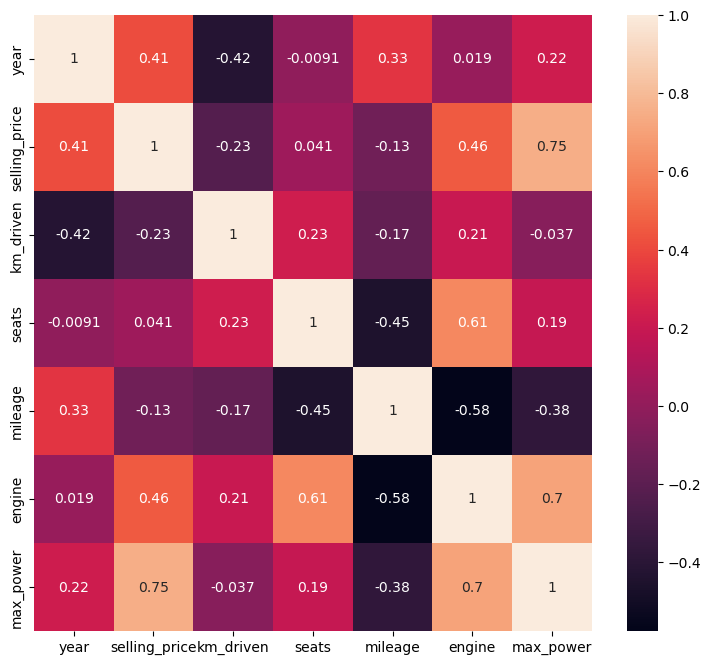

In [12]:
df_num= dados[["year","selling_price","km_driven","seats","mileage","engine","max_power"]]

plt.figure(figsize=(9,8))
hm_p = sns.heatmap(df_num.corr(),annot=True, xticklabels=True, yticklabels=True)

plt.show(hm_p)

Baixa correlação entre as variaveis numericas

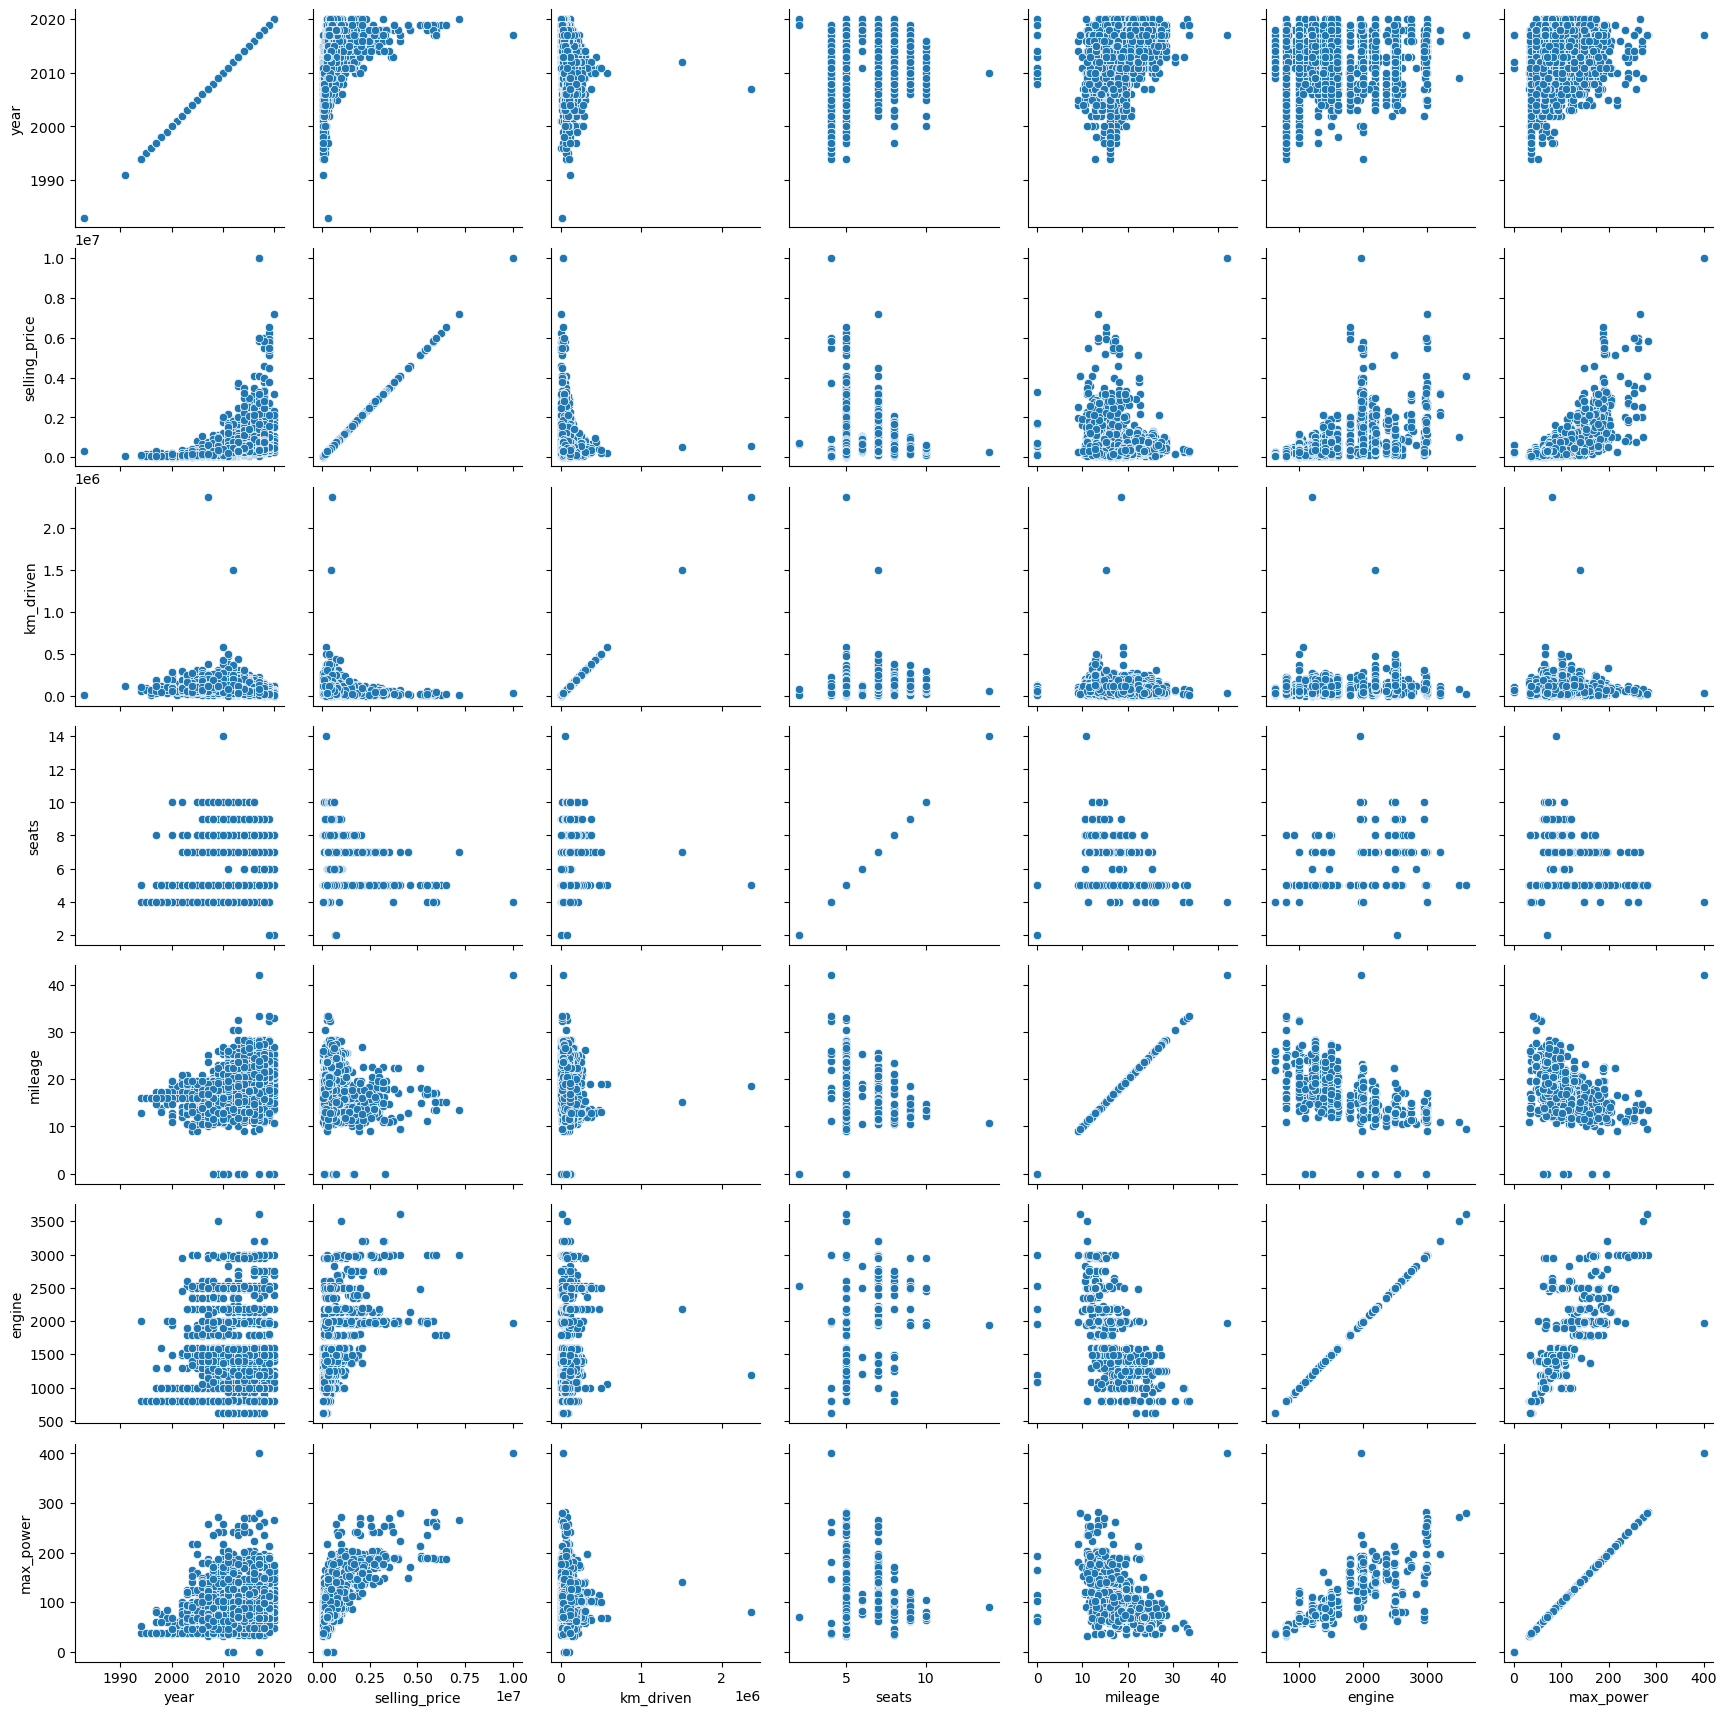

In [13]:
df_num1 = dados[["year","selling_price","km_driven","seats","mileage","engine","max_power"]]
numericas = sns.PairGrid(df_num1)
#numericas.map_diag(sns.histplot)
numericas.map(sns.scatterplot)


<AxesSubplot:xlabel='seats', ylabel='Density'>

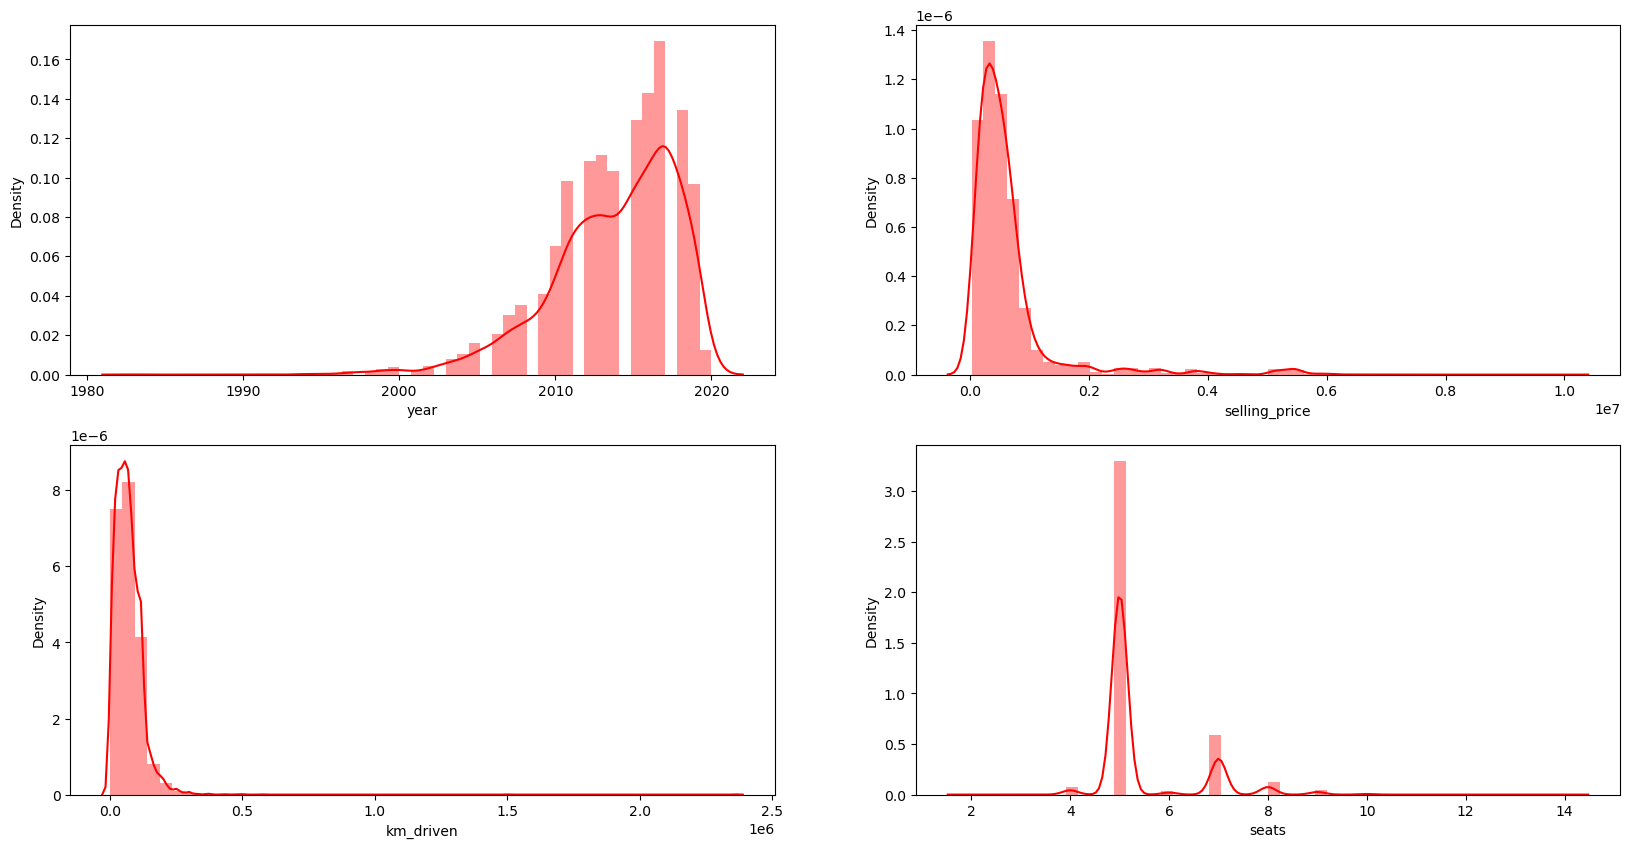

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(dados["year"],color='r',ax=axes[0,0])
sns.distplot(dados["selling_price"],color='r',ax=axes[0,1])
sns.distplot(dados["km_driven"],color='r',ax=axes[1,0])
sns.distplot(dados["seats"],color='r',ax=axes[1,1])



<AxesSubplot:xlabel='mileage', ylabel='Density'>

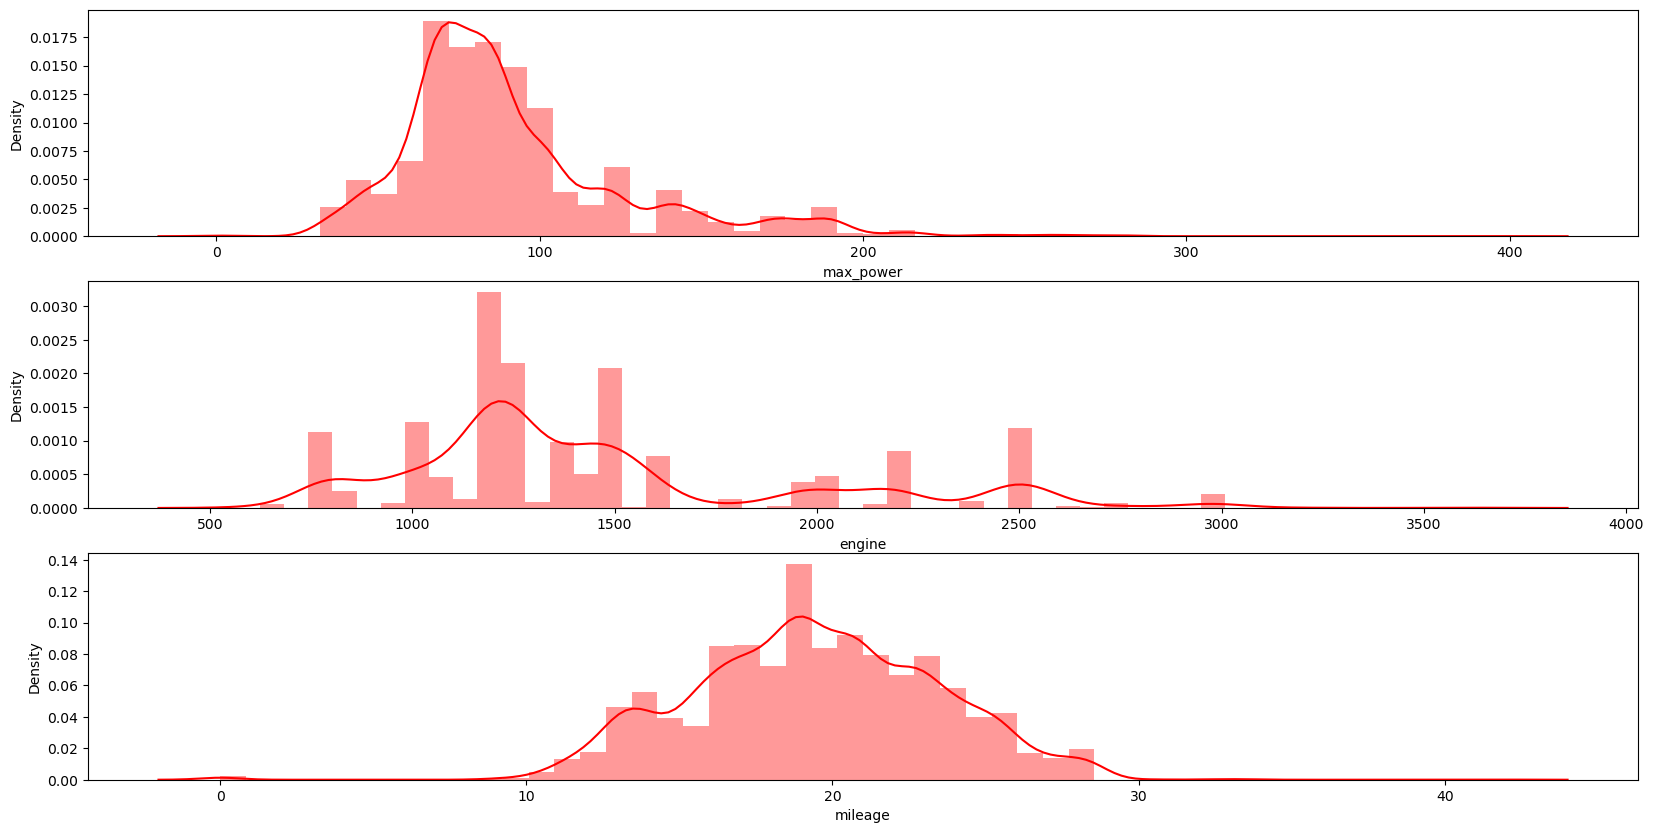

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))
sns.distplot(dados["max_power"],color='r',ax=axes[0])
sns.distplot(dados["engine"],color='r',ax=axes[1])
sns.distplot(dados["mileage"],color='r',ax=axes[2])

Os graficos de disperção reforçam oque foi visto na matriz de correlação. Dos histogramas, Price e km_driven aparenta ter distribuição exponecial. Observando year e seats, faz mais sentido assumir que são fatores

<AxesSubplot:xlabel='fuel', ylabel='max_power'>

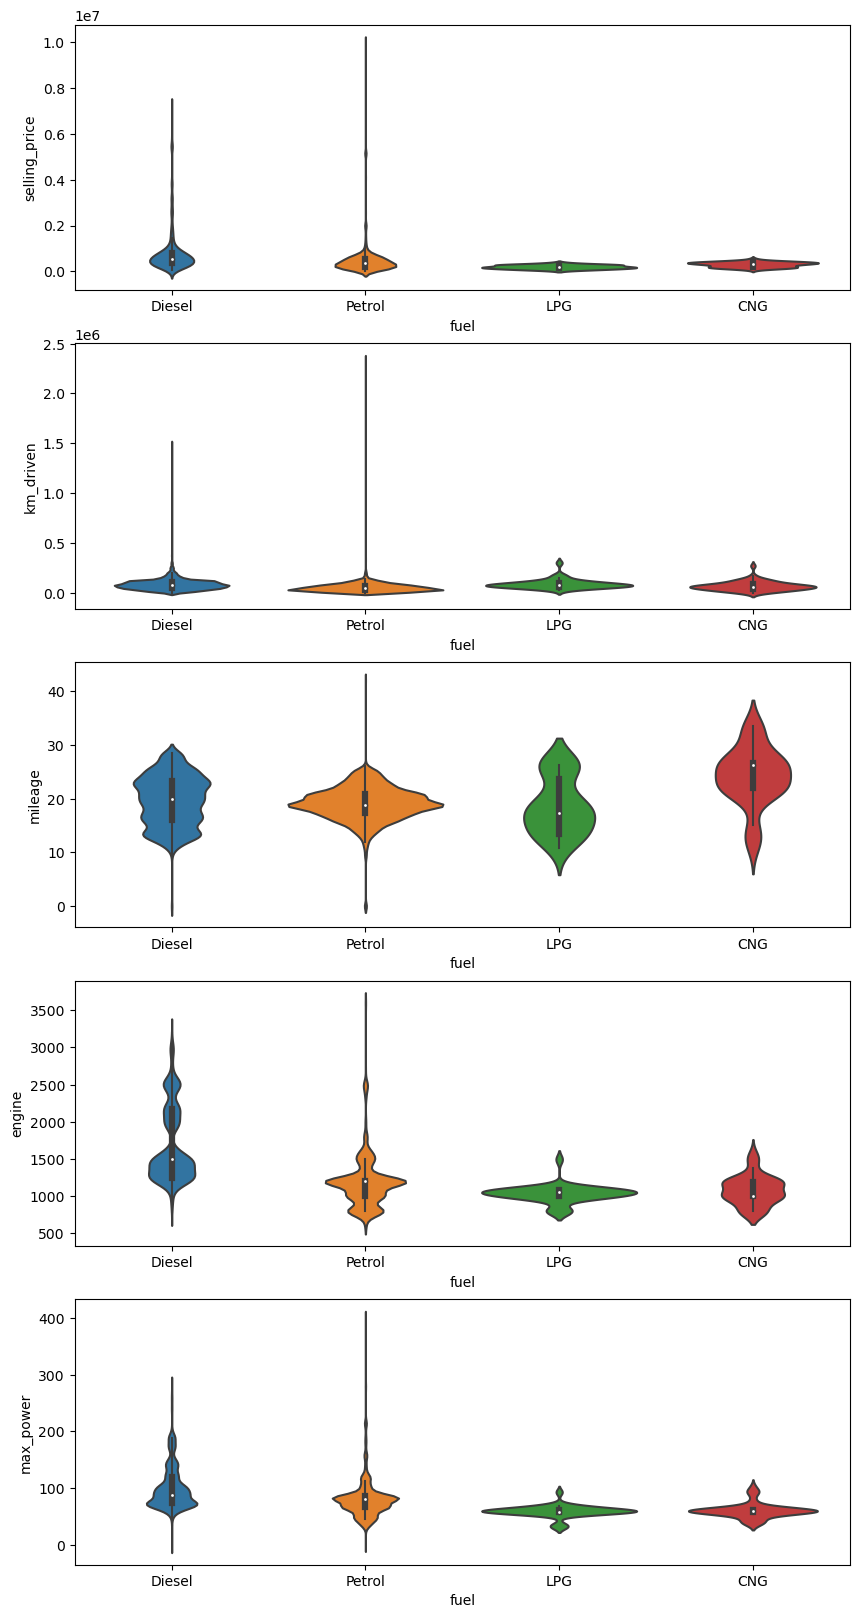

In [16]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
sns.violinplot(ax = axes[0],data = dados,x = "fuel", y = "selling_price")
sns.violinplot(ax = axes[1],data = dados,x = "fuel", y = "km_driven")
sns.violinplot(ax = axes[2],data = dados,x = "fuel", y = "mileage")
sns.violinplot(ax = axes[3],data = dados, x = "fuel",y= "engine")
sns.violinplot(ax = axes[4],data = dados, x = "fuel" ,y= "max_power")

<AxesSubplot:xlabel='owner', ylabel='max_power'>

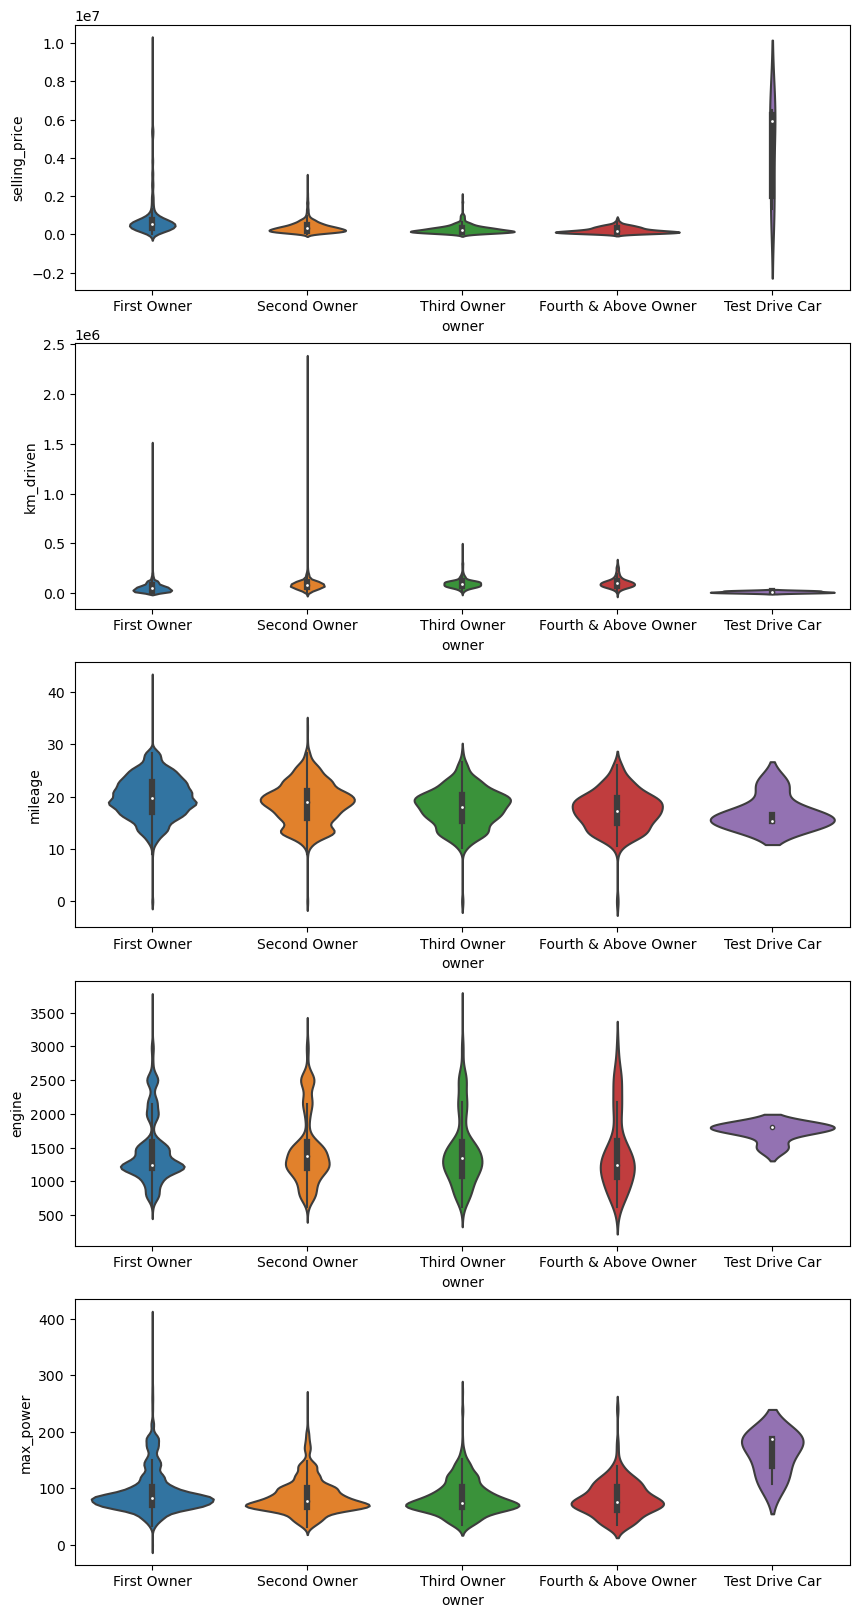

In [17]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
sns.violinplot(ax = axes[0],data = dados,x = "owner", y = "selling_price")
sns.violinplot(ax = axes[1],data = dados,x = "owner", y = "km_driven")
sns.violinplot(ax = axes[2],data = dados,x = "owner", y = "mileage")
sns.violinplot(ax = axes[3],data = dados, x = "owner",y= "engine")
sns.violinplot(ax = axes[4],data = dados, x = "owner" ,y= "max_power")


<AxesSubplot:xlabel='seller_type', ylabel='max_power'>

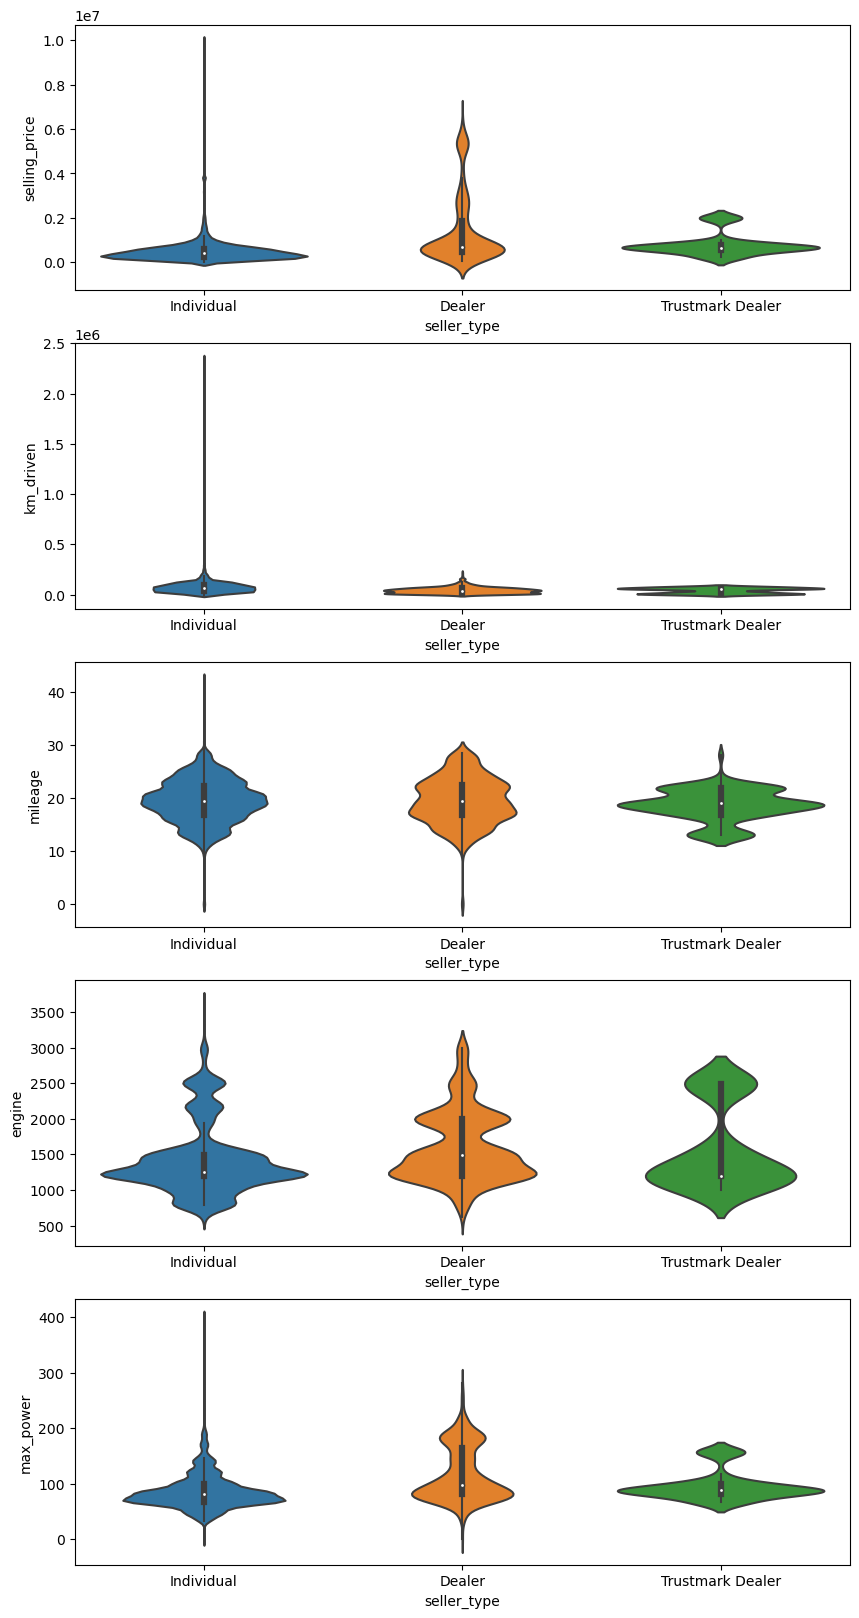

In [18]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
sns.violinplot(ax = axes[0],data = dados,x = "seller_type", y = "selling_price")
sns.violinplot(ax = axes[1],data = dados,x = "seller_type", y = "km_driven")
sns.violinplot(ax = axes[2],data = dados,x = "seller_type", y = "mileage")
sns.violinplot(ax = axes[3],data = dados, x = "seller_type",y= "engine")
sns.violinplot(ax = axes[4],data = dados, x = "seller_type" ,y= "max_power")

<AxesSubplot:xlabel='transmission', ylabel='max_power'>

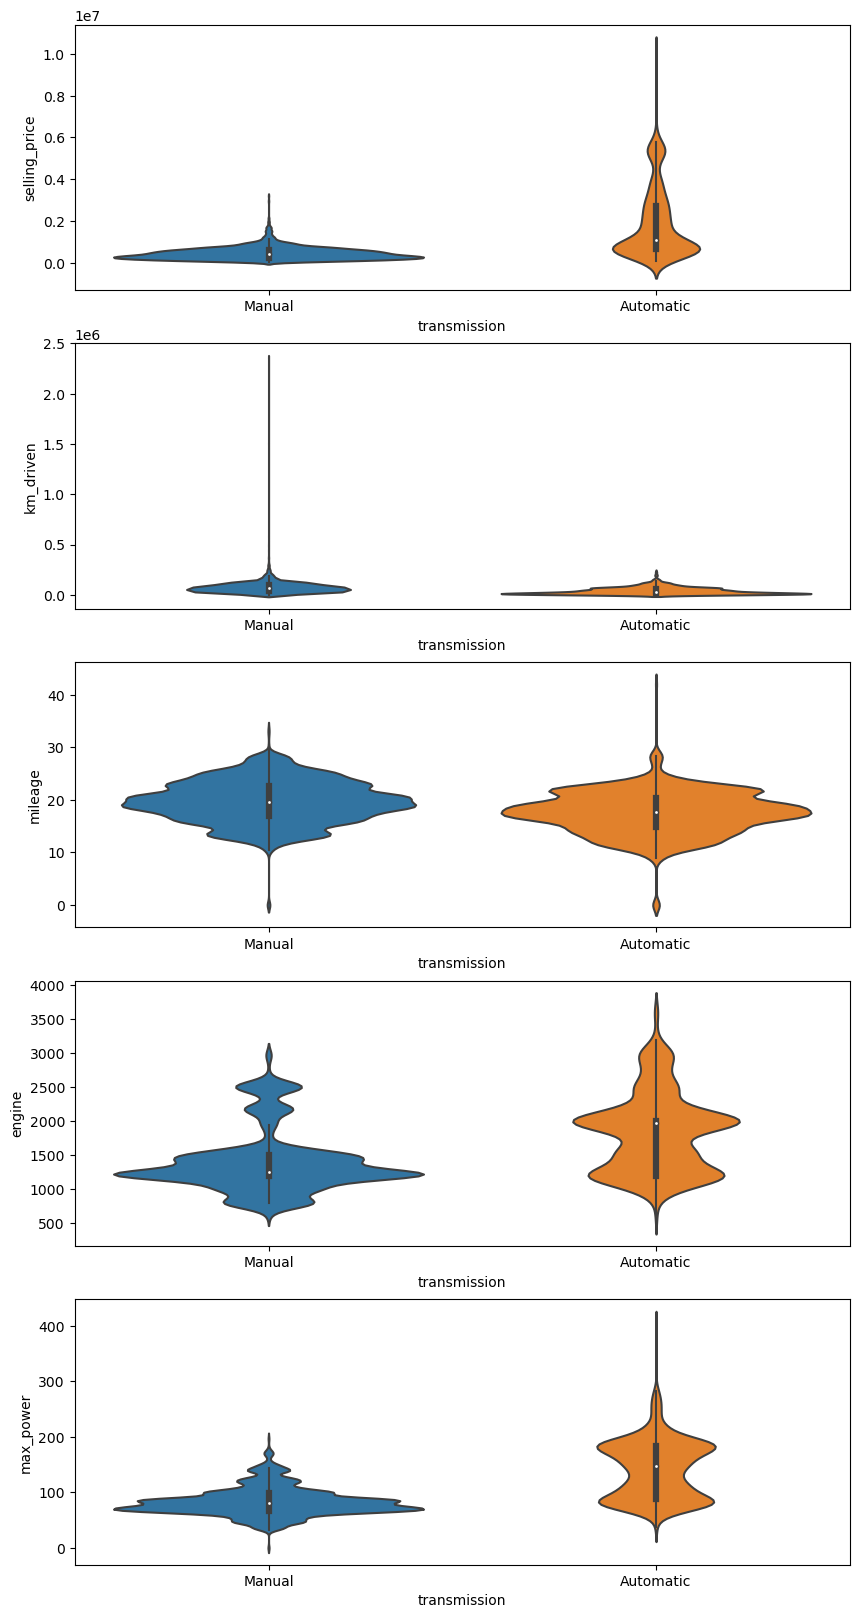

In [19]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
sns.violinplot(ax = axes[0],data = dados,x = "transmission", y = "selling_price")
sns.violinplot(ax = axes[1],data = dados,x = "transmission", y = "km_driven")
sns.violinplot(ax = axes[2],data = dados,x = "transmission", y = "mileage")
sns.violinplot(ax = axes[3],data = dados, x = "transmission",y= "engine")
sns.violinplot(ax = axes[4],data = dados, x = "transmission" ,y= "max_power")

<AxesSubplot:xlabel='seats', ylabel='max_power'>

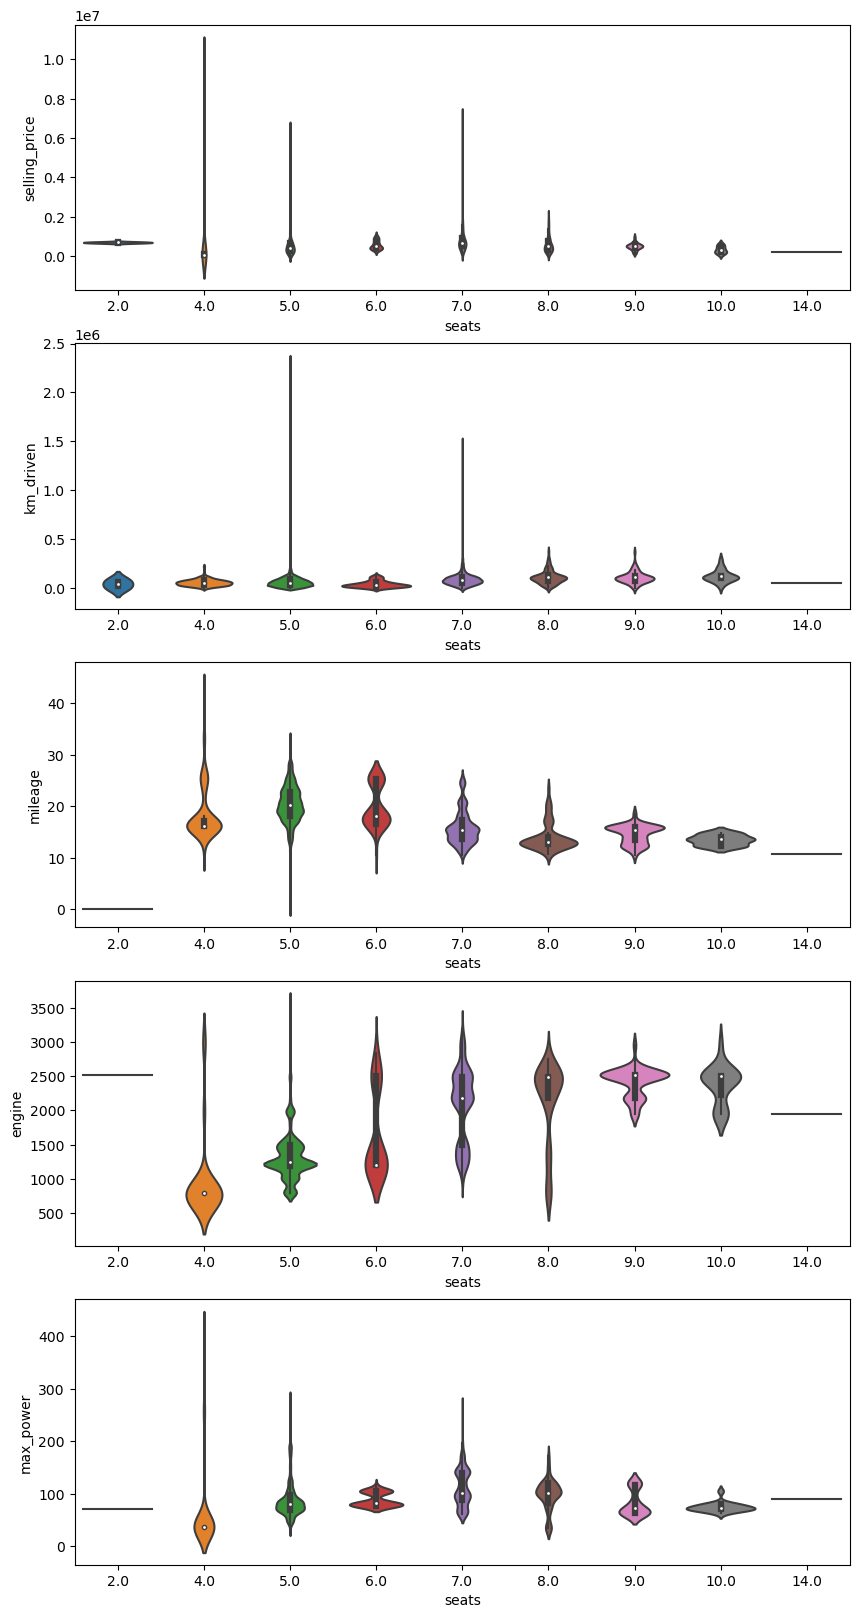

In [20]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
sns.violinplot(ax = axes[0],data = dados,x = "seats", y = "selling_price")
sns.violinplot(ax = axes[1],data = dados,x = "seats", y = "km_driven")
sns.violinplot(ax = axes[2],data = dados,x = "seats", y = "mileage")
sns.violinplot(ax = axes[3],data = dados, x = "seats",y= "engine")
sns.violinplot(ax = axes[4],data = dados, x = "seats" ,y= "max_power")

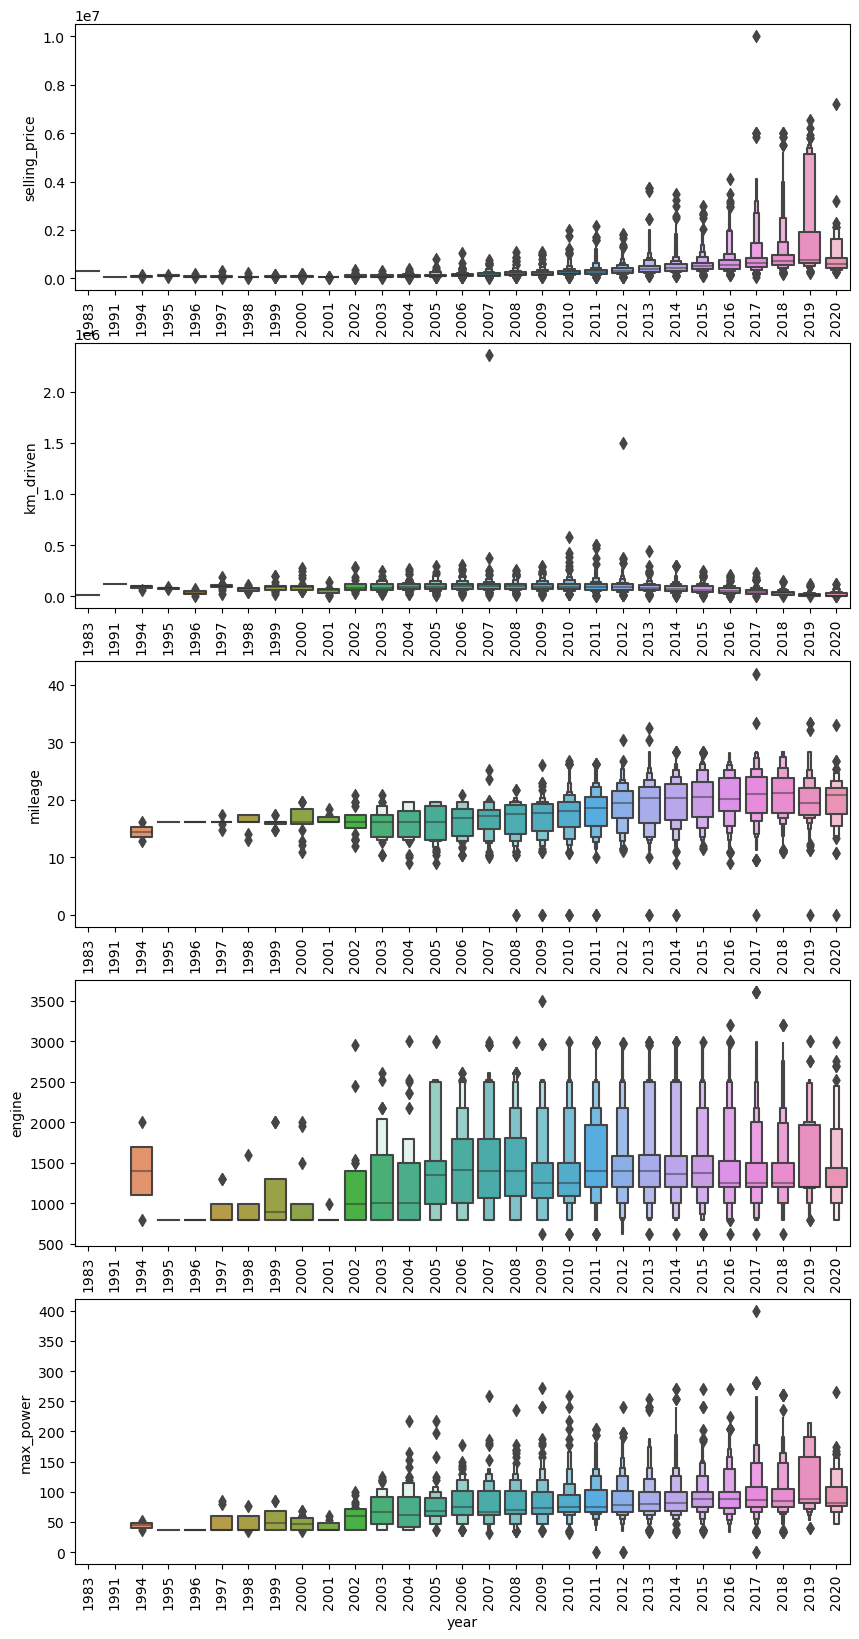

In [21]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
sns.boxenplot(ax = axes[0],data = dados,x = "year", y = "selling_price").tick_params(axis='x', rotation=90)
sns.boxenplot(ax = axes[1],data = dados,x = "year", y = "km_driven").tick_params(axis='x', rotation=90)
sns.boxenplot(ax = axes[2],data = dados,x = "year", y = "mileage").tick_params(axis='x', rotation=90)
sns.boxenplot(ax = axes[3],data = dados, x = "year",y= "engine").tick_params(axis='x', rotation=90)
sns.boxenplot(ax = axes[4],data = dados, x = "year" ,y= "max_power").tick_params(axis='x', rotation=90)

Carros vindos de test drive tem valor de venda e variedade maiores que os demais, assim como os que são vendidos por vendedores profissionais e veiculos de transmissão automatica. Os demais fatores não aparentam ter diferença significante entre si.
Se tradando da variavel quiletragem, não foram observadas grandes diferenças de distribuição 

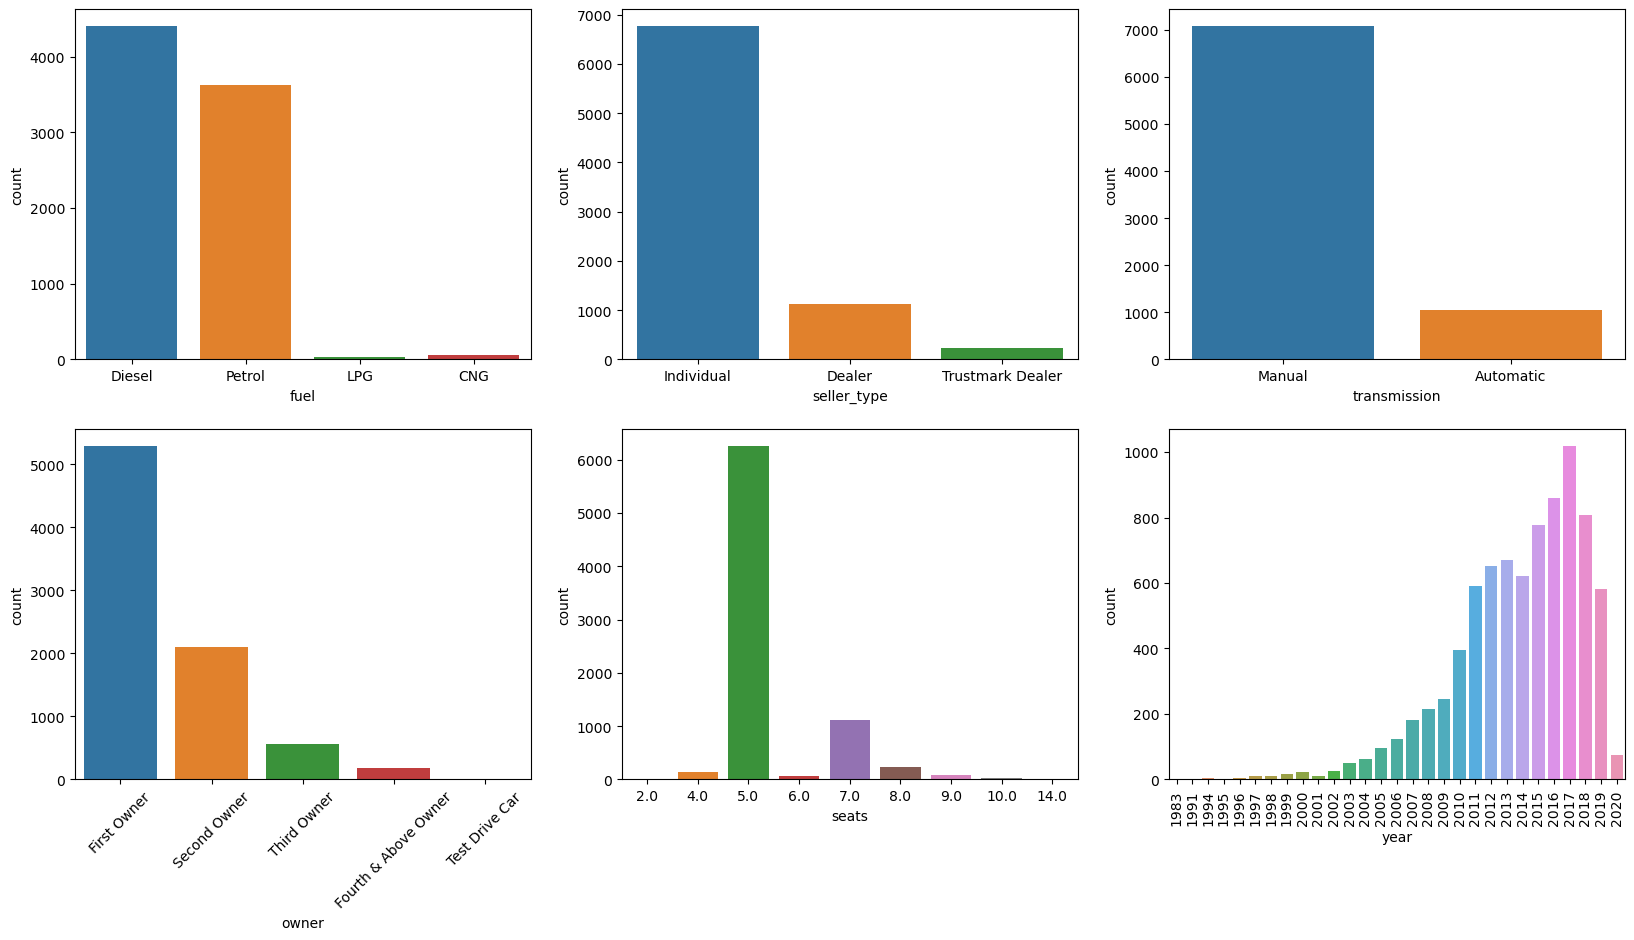

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.countplot(ax = axes[0,0],data = dados, x = "fuel")
sns.countplot(ax = axes[0,1],data = dados, x = "seller_type")
sns.countplot(ax = axes[0,2],data = dados, x = "transmission")
sns.countplot(ax = axes[1,0],data = dados, x = "owner").tick_params(axis='x', rotation=45)
sns.countplot(ax = axes[1,1],data = dados, x = "seats")
sns.countplot(ax = axes[1,2],data = dados, x = "year").tick_params(axis='x', rotation=90)


### Cruzando algumas variáveis
Fuel e Owner

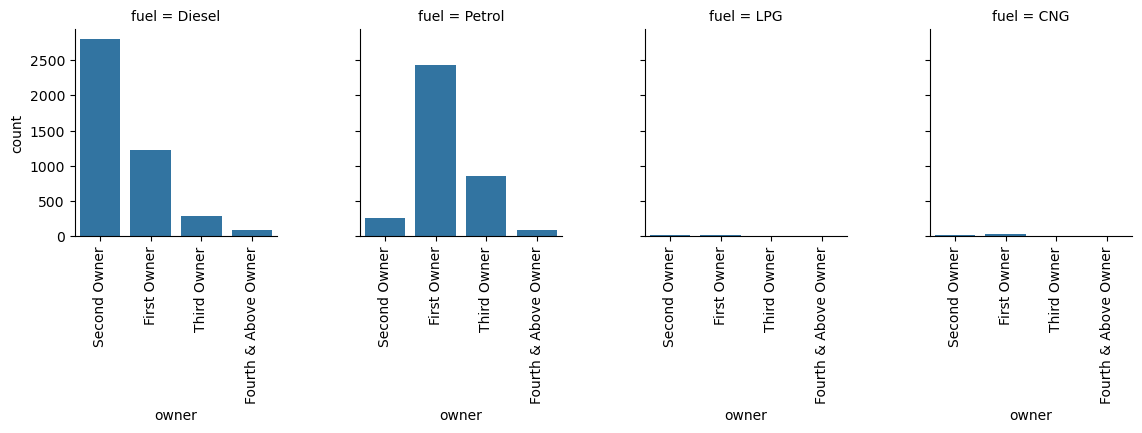

In [23]:
F_O = sns.FacetGrid(dados, col="fuel")
F_O.map(sns.countplot, "owner").set_xticklabels(rotation=90)

Fuel e seats

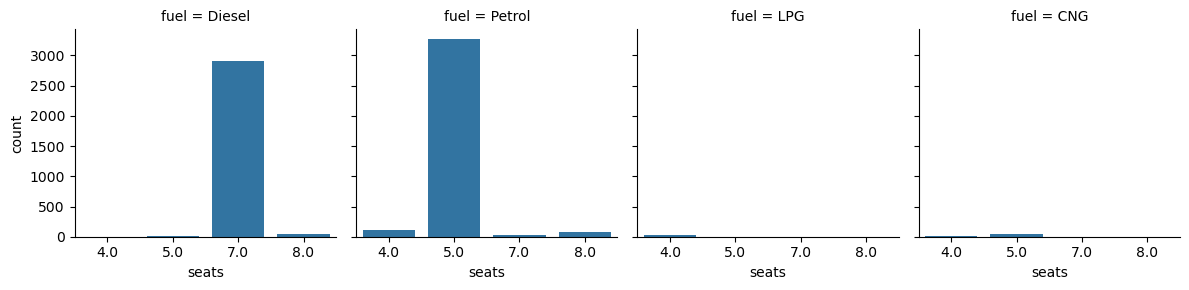

In [24]:
F_O = sns.FacetGrid(dados, col="fuel")
F_O.map(sns.countplot, "seats")

Fuel e transmission

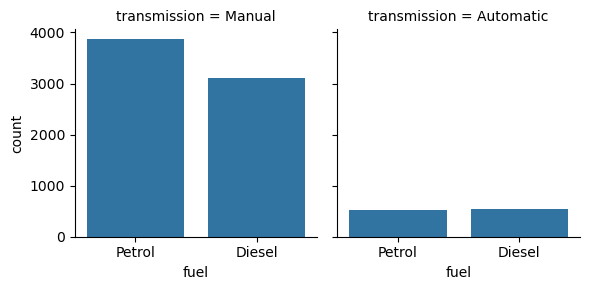

In [25]:
F_O = sns.FacetGrid(dados, col="transmission")
F_O.map(sns.countplot, "fuel")

## Modelagem selling_price

A modelagem sera com foco na predição, seguindo as premissas do machine learning

#### KFolds para previnir o overfitng

In [26]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold


In [27]:
dados = dados.dropna()
x = dados.drop(columns=['name','torque','selling_price'])
x = pd.get_dummies(x)
y = dados[['selling_price']]

In [28]:
seed = 23041991
kf = KFold(n_splits=15,random_state=seed,shuffle=True)
kf.get_n_splits(x)

15

In [29]:
print(kf)

KFold(n_splits=15, random_state=23041991, shuffle=True)


### Usando KNN Regressor

In [30]:
performance = {'MAE': [], 'R2': []}
performance = pd.DataFrame(data = performance)

for train_index, test_index in kf.split(x):
    # bases de treino e teste
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_r = KNeighborsRegressor(n_neighbors = 5)
    knn_r.fit(X_train, y_train)
     # preditos
    y_pred = knn_r.predict(X_test)

    #Metricas
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    score = metrics.r2_score(y_test, y_pred)
    performance = performance.append({'MAE': mae, 'MSE': mse, 'R2': score}, ignore_index = True)

In [31]:
print("Mean MAE score:", np.mean(performance["MAE"]))
print("Mean MSE score:", np.mean(performance["MSE"]))
print("SD MAE:", np.std(performance["MAE"]))
print("Mean R2:", np.mean(performance["R2"]))
print("\n\n\n")
print(performance)


Mean MAE score: 164464.52475844786
Mean MSE score: 126766949310.18513
SD MAE: 12948.293429515423
Mean R2: 0.8057890882395274




         MAE   R2             MSE
0  128657.58 0.88  55775957185.42
1  162364.06 0.72 110132458569.37
2  162198.65 0.81 122313195946.84
3  158090.14 0.87  96173813360.00
4  176702.68 0.76 230618380382.95
5  157236.67 0.77  87217588961.75
6  170865.57 0.86 106715854373.49
7  163106.54 0.76 129526136861.33
8  185607.21 0.65 229885454648.08
9  184967.77 0.80 175040624677.53
10 158514.69 0.88  80553090406.71
11 168825.14 0.87 106600249157.59
12 160607.75 0.79 179086576199.38
13 163905.69 0.83  96527276619.48
14 165317.73 0.84  95337582302.87


#### Usando Regressão linear


In [32]:
performance = {'MAE': [], 'R2': []}
performance = pd.DataFrame(data = performance)

for train_index, test_index in kf.split(x):
    # bases de treino e teste
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lm = LinearRegression()
    lm.fit(X_train, y_train)
     # preditos
    y_pred = lm.predict(X_test)

    #Metricas
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    score = metrics.r2_score(y_test, y_pred)
    performance = performance.append({'MAE': mae, 'MSE': mse, 'R2': score}, ignore_index = True)

In [33]:
print("Mean MAE score:", np.mean(performance["MAE"]))
print("Mean MSE score:", np.mean(performance["MSE"]))
print("SD MAE:", np.std(performance["MAE"]))
print("Mean R2:", np.mean(performance["R2"]))
print("\n\n\n")
print(performance)

Mean MAE score: 275761.58611182537
Mean MSE score: 211822119700.78348
SD MAE: 12412.771260969732
Mean R2: 0.6722153904716993




         MAE   R2             MSE
0  277459.85 0.61 177697341009.41
1  258166.73 0.61 154399150518.56
2  264267.71 0.69 198745003508.96
3  286068.47 0.67 236475110790.54
4  286692.32 0.69 298540870778.22
5  267320.92 0.63 143249391325.54
6  304635.33 0.67 260525678645.53
7  263281.06 0.67 179417100954.95
8  263116.22 0.68 210564311404.10
9  294941.15 0.70 268524077362.58
10 274912.80 0.69 204135249588.12
11 272297.22 0.71 234161822362.35
12 276522.98 0.73 230994015733.42
13 269651.04 0.66 193384812100.53
14 277090.00 0.68 186517859428.94


#### Usando Decision Tree

In [34]:
performance = {'MAE': [], 'R2': []}
performance = pd.DataFrame(data = performance)

for train_index, test_index in kf.split(x):
    # bases de treino e teste
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dt = DecisionTreeRegressor() # usando o padrão
    dt.fit(X_train, y_train)
     # preditos
    y_pred = dt.predict(X_test)

    #Metricas
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    score = metrics.r2_score(y_test, y_pred)
    performance = performance.append({'MAE': mae, 'MSE': mse, 'R2': score}, ignore_index = True)

In [35]:
print("Mean MAE score:", np.mean(performance["MAE"]))
print("Mean MSE score:", np.mean(performance["MSE"]))
print("SD MAE:", np.std(performance["MAE"]))
print("Mean R2:", np.mean(performance["R2"]))
print("\n\n\n")
print(performance)

Mean MAE score: 75365.45394826429
Mean MSE score: 26668916055.1675
SD MAE: 4124.003606171494
Mean R2: 0.9574217766984339




        MAE   R2            MSE
0  75443.24 0.94 28636163552.79
1  72759.77 0.96 16167710714.07
2  68590.30 0.97 16231656348.26
3  79033.84 0.95 34267498358.38
4  81370.19 0.94 56052361687.38
5  82927.70 0.90 37762057564.91
6  73258.64 0.97 20818949551.77
7  71237.84 0.97 18155384430.47
8  70483.15 0.97 21494063826.72
9  76900.55 0.98 21831732537.32
10 71162.28 0.98 16374986818.61
11 78408.22 0.96 33535802912.70
12 74523.08 0.97 25789727701.68
13 79812.42 0.95 29422505979.67
14 74570.57 0.96 23493138842.77


#### Usando Random Forest

In [36]:
performance = {'MAE': [], 'R2': []}
performance = pd.DataFrame(data = performance)

for train_index, test_index in kf.split(x):
    # bases de treino e teste
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestRegressor() # usando o padrão
    rf.fit(X_train, y_train)
     # preditos
    y_pred = rf.predict(X_test)

    #Metricas
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    score = metrics.r2_score(y_test, y_pred)
    performance = performance.append({'MAE': mae, 'MSE': mse, 'R2': score}, ignore_index = True)

In [37]:
print("Mean MAE score:", np.mean(performance["MAE"]))
print("Mean MSE score:", np.mean(performance["MSE"]))
print("SD MAE:", np.std(performance["MAE"]))
print("Mean R2:", np.mean(performance["R2"]))
print("\n\n\n")
print(performance)

Mean MAE score: 66054.2766716567
Mean MSE score: 19876214726.48229
SD MAE: 4235.47114545569
Mean R2: 0.9698046967662763




        MAE   R2            MSE
0  63496.72 0.97 14870289888.30
1  65052.28 0.97 11883669355.26
2  59960.25 0.98 10462518222.79
3  67943.68 0.98 17529923651.58
4  76115.98 0.93 68061721032.55
5  69059.41 0.95 20986936677.49
6  67250.59 0.98 14293827202.00
7  62828.73 0.97 14084864145.21
8  72789.26 0.95 33599374226.07
9  66749.48 0.98 19672148401.90
10 64750.81 0.97 17133686584.52
11 66244.53 0.98 16706666671.45
12 62994.54 0.98 12725880054.09
13 65987.92 0.97 16079568706.16
14 59589.97 0.98 10052146077.87
